## Step 1: Business problem understanding

**prediction of the medical bill amount by hospitals that can be covered by the health insurace of an individual**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

## Step 2: Data understanding

In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
continuous = ['age', 'bmi', 'charges']

discrete_categorical = ['sex', 'smoker', 'region']

discrete_count = ['children']

In [5]:
df[continuous].describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


In [6]:
df[continuous].corr()

,age,bmi,charges
age,1.000000,0.109272,0.299008
bmi,0.109272,1.000000,0.198341
charges,0.299008,0.198341,1.000000


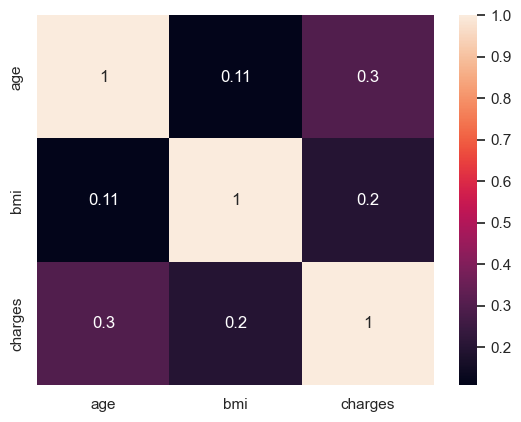

In [7]:
sns.heatmap(df[continuous].corr(), annot = True)
plt.show()

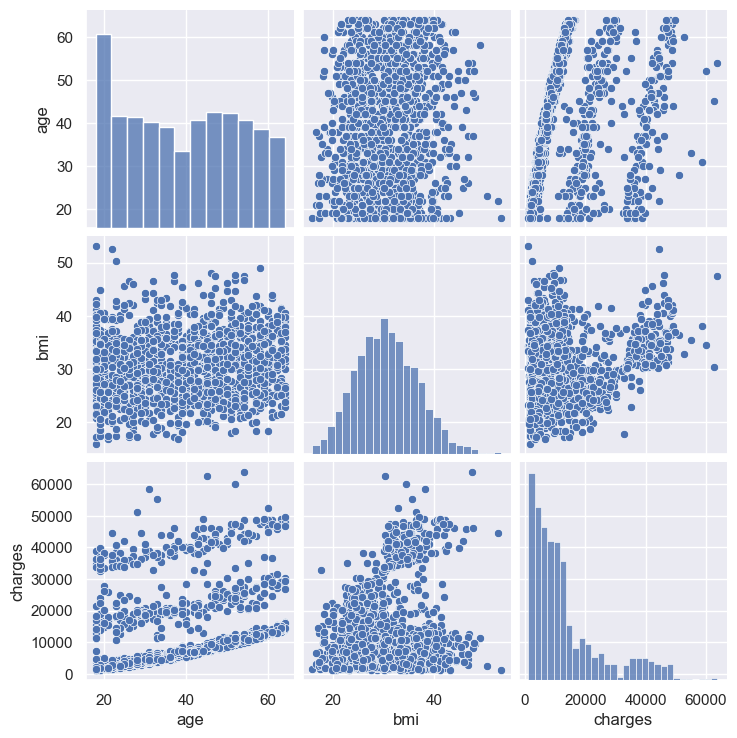

In [8]:
sns.pairplot(df[continuous])
plt.show()

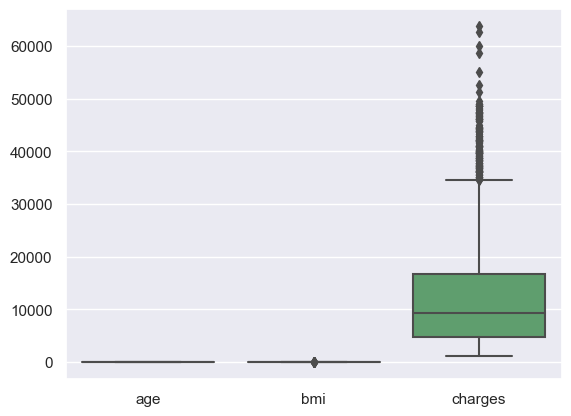

In [9]:
sns.boxplot(df[continuous])
plt.show()

In [10]:
df[continuous].skew()

age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64

In [11]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [12]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [13]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [14]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [15]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

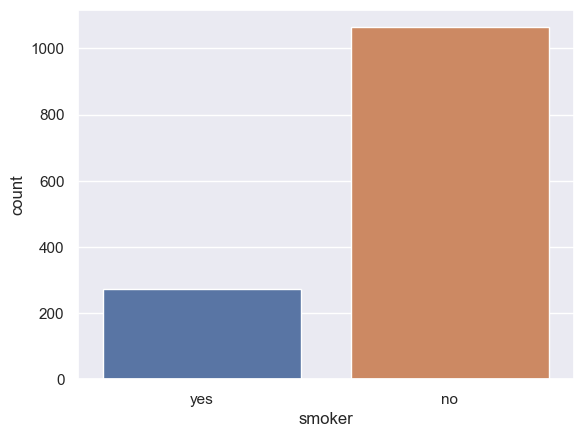

In [16]:
sns.countplot(data = df, x = 'smoker')
plt.show()

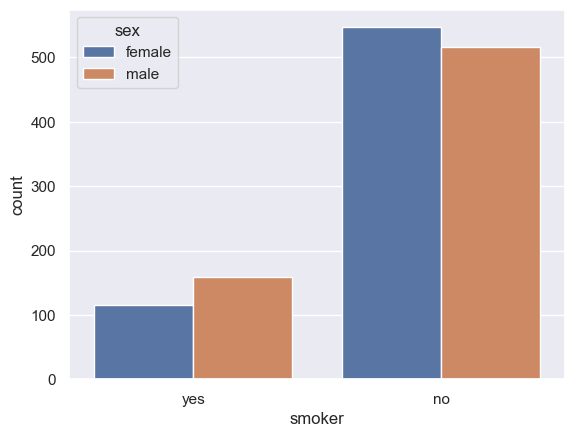

In [17]:
sns.countplot(data = df, x = 'smoker', hue = 'sex')
plt.show()

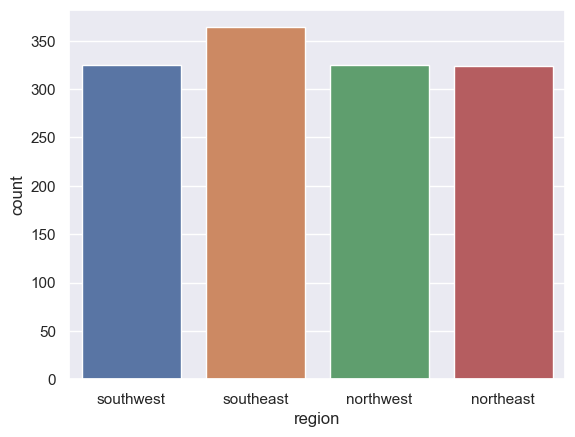

In [19]:
sns.countplot(data = df, x = 'region')
plt.show()

## Step 3: Data preprocessing

In [38]:
# checking missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [21]:
# duplicate records
df.duplicated().sum()

1

In [22]:
df.drop_duplicates(inplace = True)

In [23]:
# encoding
df['sex'] = df['sex'].map({'female': 0, 'male': 1})

In [24]:
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['region'] = le.fit_transform(df['region'])

In [26]:
# creating variables
X = df.drop(columns = ['charges'])
y = df['charges']

#### train test split

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, random_state = 32, train_size = 0.8)

## Step 4: Modelling and evaluation

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# prediction
ypred_train = lr.predict(X_train)
ypred_test = lr.predict(X_test)

# evaluation
print('train: ', lr.score(X_train, y_train))
print('test: ', lr.score(X_test, y_test))

from sklearn.model_selection import cross_val_score
print('cv: ', cross_val_score(lr, X_train, y_train, cv = 5).mean())

train:  0.7402547270827715
test:  0.7902468003183346
cv:  0.7335639489901279


In [30]:
# regression report

In [33]:
import statsmodels.api as sm

X = df_train.drop(columns = ['charges'])
X = sm.add_constant(X)

y = df_train['charges']

model1 = sm.OLS(y, X).fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     504.4
Date:                Wed, 06 Mar 2024   Prob (F-statistic):          1.04e-306
Time:                        22:57:45   Log-Likelihood:                -10845.
No. Observations:                1069   AIC:                         2.170e+04
Df Residuals:                    1062   BIC:                         2.174e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.177e+04   1095.313    -10.745      0.000   -1.39e+04   -9619.650
age          257.1659     13.529     19.009      0.000     230.620     283.712
sex         -175.6782    380.916     -0.461      0.645    -923.111     571.755
bmi          336.2172     32.223     10.434      0.000     272.988     399.446
children     559.3428    156.284      3.579      0.000     252.683     866.003
smoker      2.371e+04    473.568     50.063      0.000    2.28e+04    2.46e+04
region      -418.6291    173.137     -2.418      0.016    -758.359     -78.899
==============================================================================
Omnibus:                      244.329   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              563.107
Skew:                           1.239   Prob(JB):                    5.28e-123
Kurtosis:                       5.550   Cond. No.                         297.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# final model
# removing the unimportant 'sex' feature

In [36]:
X_mlr = df.drop(columns = ['charges', 'sex'])
y = df['charges']

X_train_mlr, X_test_mlr, y_train, y_test = train_test_split(X_mlr, y, train_size = 0.8, random_state = 32)
lr = LinearRegression()
lr.fit(X_train_mlr, y_train)

# prediction
ypred_train = lr.predict(X_train_mlr)
ypred_test = lr.predict(X_test_mlr)

# evaluation
print('train: ', lr.score(X_train_mlr, y_train))
print('test: ', lr.score(X_test_mlr, y_test))
print('cv: ', cross_val_score(lr, X_train_mlr, y_train, cv = 5).mean())

train:  0.7402027034383869
test:  0.7903088658781574
cv:  0.7350034071584393
